# Customer analysis round 4
## Tasks

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
       1. Use seaborn library to construct distribution plots for the numerical variables
        2. Use Matplotlib to construct histograms
        3. Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features


In [1]:
import pandas as pd
import numpy as np

In [2]:
customer_analysis = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
print("The number of rows and columns is", customer_analysis.shape)
display(customer_analysis.info()) # display infor to get a first impression on the information in the dataframe

The number of rows and columns is (9134, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Mon

None

In [8]:
customer_analysis.head(10) # check how the information is stored to later apply standardizetions

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


Standardize columns

In [4]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df # I had to change this part because in this version of the csv file there is no "unnamed: 0" column (before: return df.drop(['unnamed:_0'], axis=1))
def clean_columns (df):
    df = standardize_columns(df)
    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')
    df['effective_month'] = df['effective_to_date'].dt.month
    return df

In [5]:
customer_copy = customer_analysis.copy() # work on the copy

In [7]:
customer_copy = clean_columns(customer_copy) # apply standardization
customer_copy.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,1
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2


In [9]:
nulls = pd.DataFrame(round(customer_copy.isna().sum()/len(customer_copy),4)*100) # check for missing values
display(nulls)

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0
education,0.0
effective_to_date,0.0
employmentstatus,0.0
gender,0.0
income,0.0


## Round 4 - start
- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [10]:
display(customer_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

None

In [14]:
numerical = customer_copy.select_dtypes(include=np.number)
categorical = customer_copy.select_dtypes(include=object)
display(numerical.columns)
display(categorical.columns)
display(numerical.info())
display(categorical.info())

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_month'],
      dtype='object')

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
 8   effective_month                9134 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 642.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


None

## Normality
Now we will try to check the normality of the numerical variables visually
1. Use seaborn library to construct distribution plots for the numerical variables
2. Use Matplotlib to construct histograms
3. Do the distributions for different numerical variables look like a normal distribution? - Not really. And the ones that are unimodal are heavily skewed.

Information on displot (seaborn) [here](https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns 
import itertools
%matplotlib inline

In [16]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_month'],
      dtype='object')

### Pairplot
- Shows distributions and relationships between variables
- A bit messy when presented with high numbers of variables

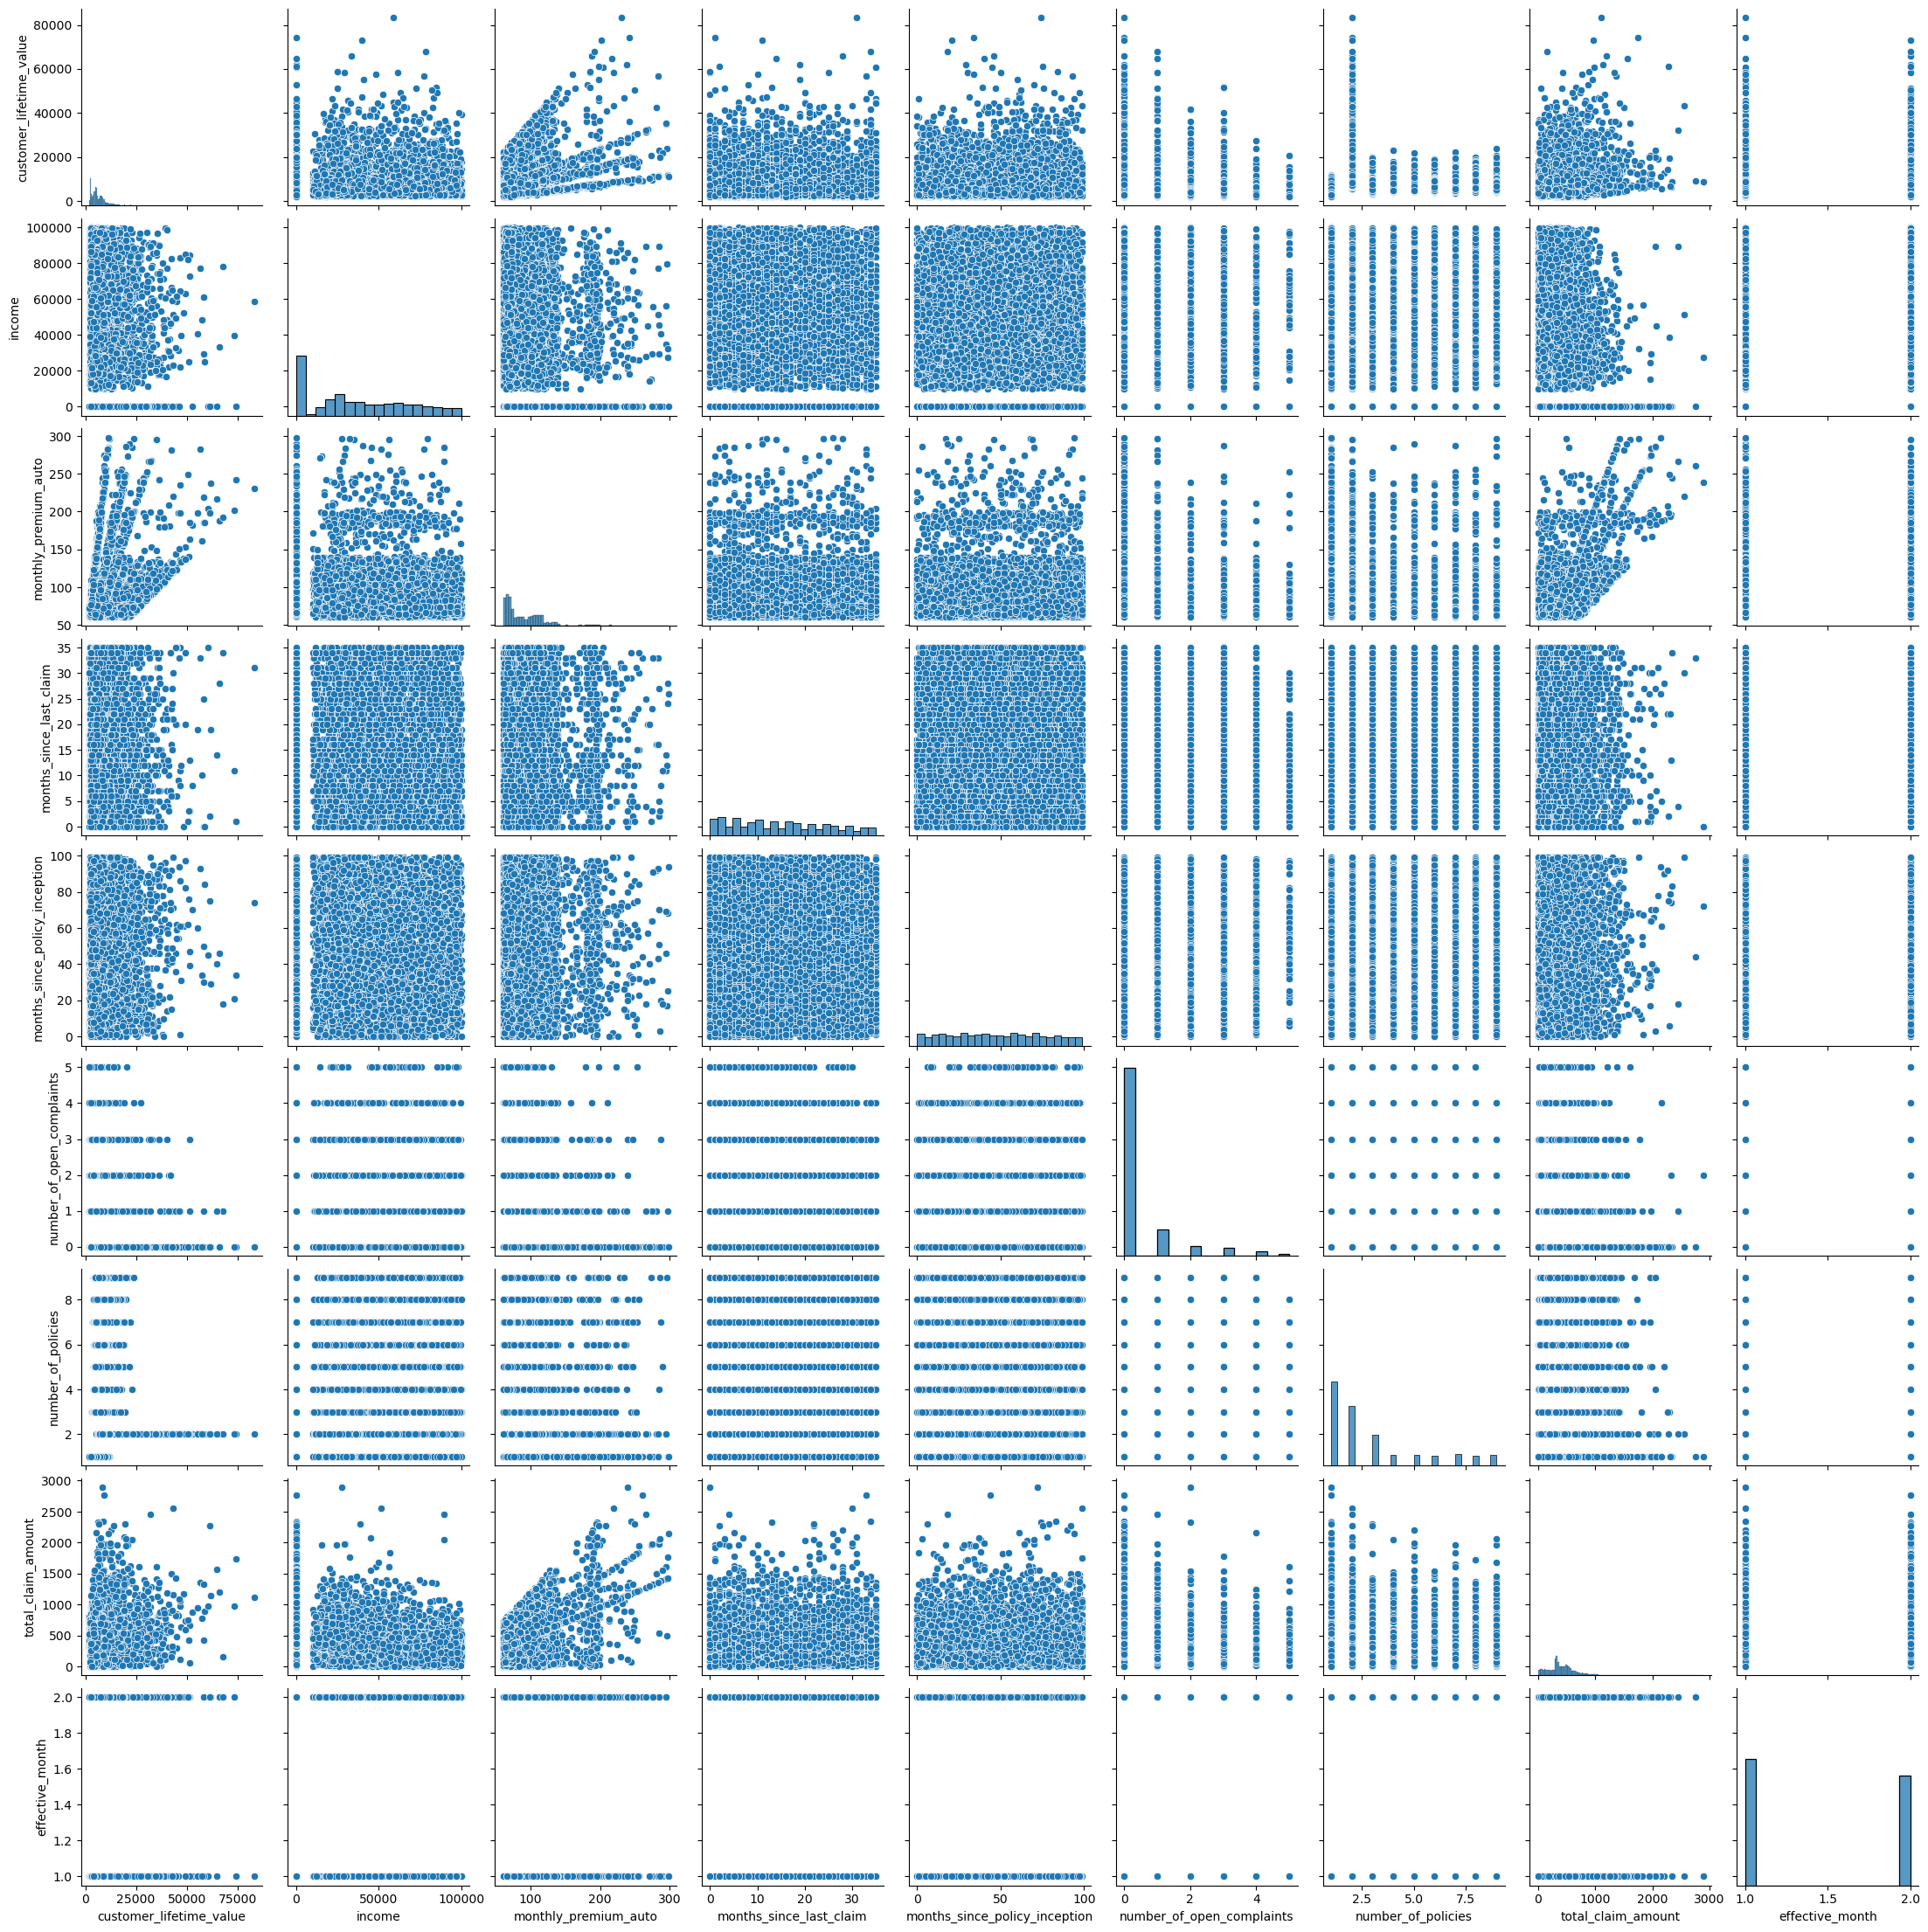

In [17]:
sns.pairplot(numerical) # Quick option but not easy to visualize the data

### Seaborn plots
- displot() cannot be used anymore with subplots. Explanation above under "normality" text section.

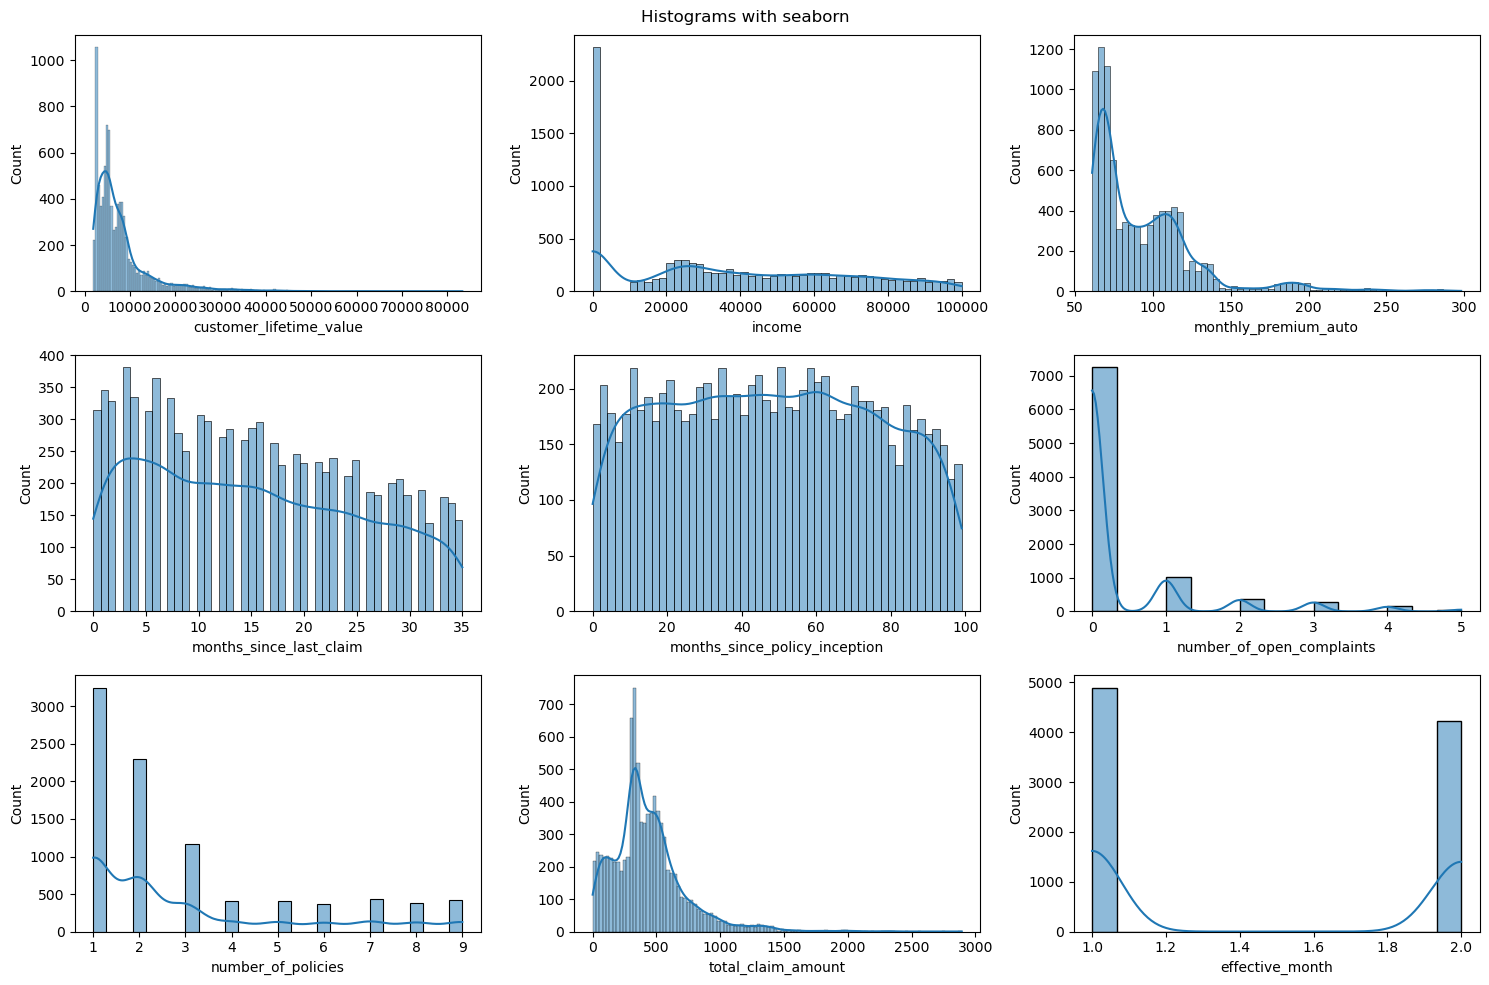

In [77]:
# Attempt to have different colours for each graph without manually entering them
# palette = itertools.cycle(sns.color_palette())
# c= next(palette) --> color=c in each graph
fig, ax = plt.subplots(3,3, figsize=(15,10))
fig.suptitle('Histograms with seaborn')
sns.histplot(numerical, x="customer_lifetime_value", kde=True, ax=ax[0,0])
sns.histplot(numerical, x="income", kde=True, bins=50, ax=ax[0,1])
sns.histplot(numerical, x="monthly_premium_auto", kde=True, ax=ax[0,2])
sns.histplot(numerical, x="months_since_last_claim", kde=True, bins=50, ax=ax[1,0])
sns.histplot(numerical, x="months_since_policy_inception", kde=True, bins=50,ax=ax[1,1])
sns.histplot(numerical, x="number_of_open_complaints", kde=True, ax=ax[1,2])
sns.histplot(numerical, x="number_of_policies", kde=True, ax=ax[2,0])
sns.histplot(numerical, x="total_claim_amount", kde=True, ax=ax[2,1])
sns.histplot(numerical, x="effective_month", kde=True, ax=ax[2,2])

plt.tight_layout()
plt.show()

### Matplotlib plots

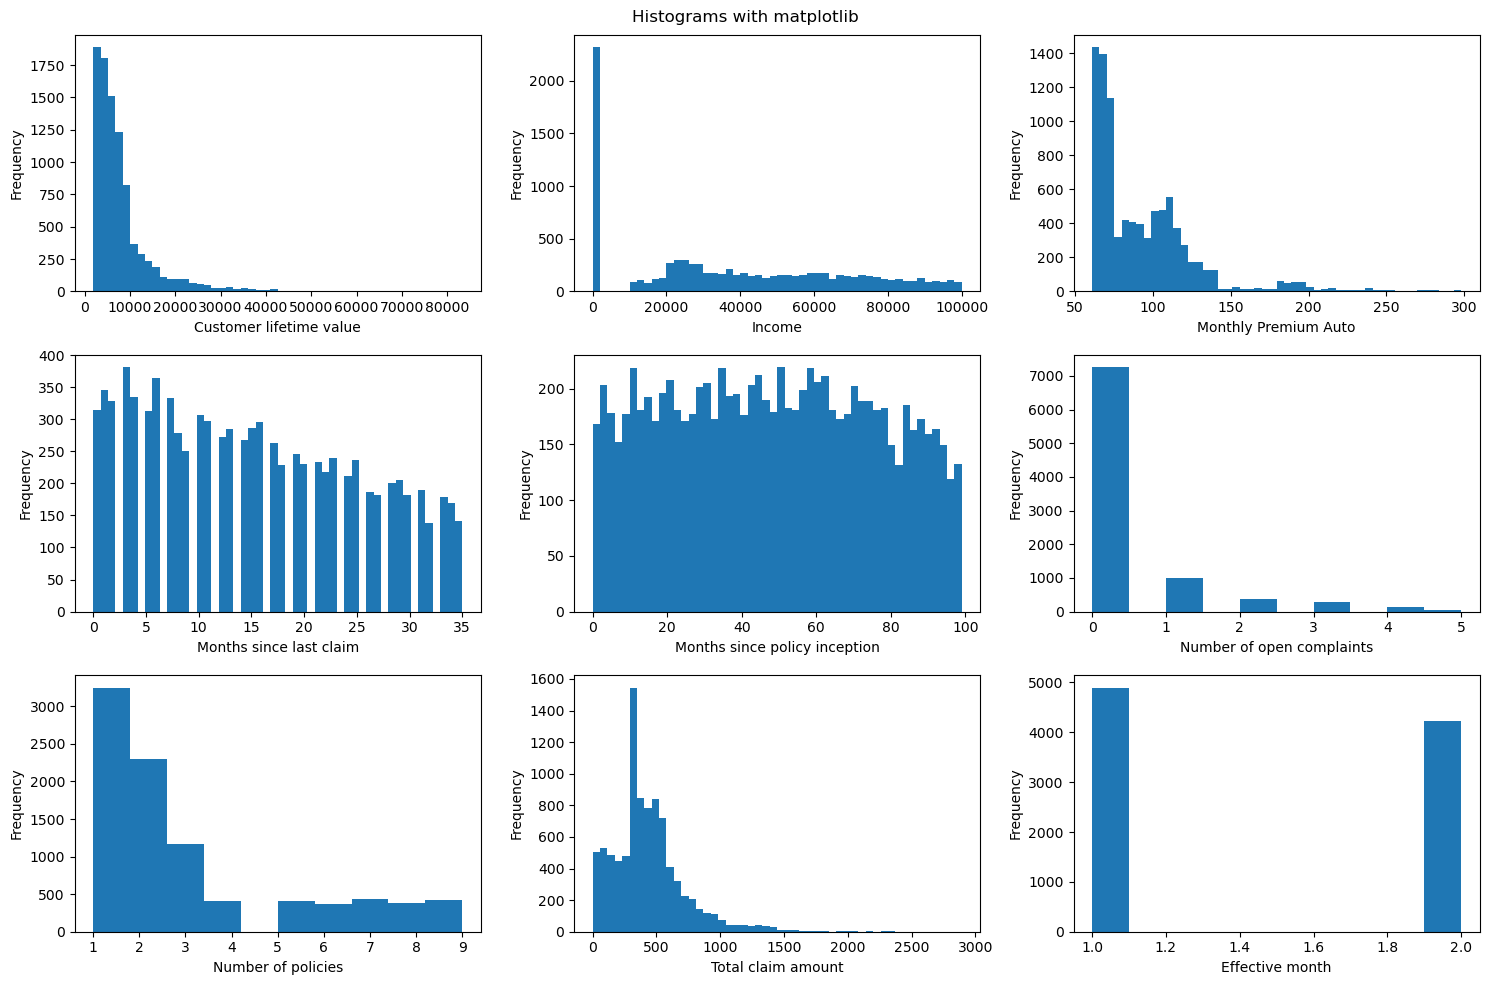

In [78]:
# Attempt to have different colours for each graph without manually entering them
# palette = itertools.cycle(sns.color_palette())
# c= next(palette)

fig, ax = plt.subplots(3,3, figsize=(15,10))
fig.suptitle('Histograms with matplotlib')
ax[0,0].hist("customer_lifetime_value",data=numerical,  bins=50)
ax[0, 0].set_xlabel('Customer lifetime value')
ax[0, 0].set_ylabel('Frequency')

ax[0,1].hist("income", data=numerical, bins=50)
ax[0,1].set_xlabel('Income')
ax[0,1].set_ylabel('Frequency')

ax[0,2].hist("monthly_premium_auto", data=numerical, bins=50)
ax[0,2].set_xlabel("Monthly Premium Auto")
ax[0,2].set_ylabel('Frequency')

ax[1,0].hist("months_since_last_claim", data=numerical, bins=50)
ax[1,0].set_xlabel("Months since last claim")
ax[1,0].set_ylabel('Frequency')


ax[1,1].hist("months_since_policy_inception", data=numerical, bins=50)
ax[1,1].set_xlabel("Months since policy inception")
ax[1,1].set_ylabel('Frequency')

ax[1,2].hist("number_of_open_complaints", data=numerical)
ax[1,2].set_xlabel("Number of open complaints")
ax[1,2].set_ylabel('Frequency')

ax[2,0].hist("number_of_policies", data=numerical)
ax[2,0].set_xlabel("Number of policies")
ax[2,0].set_ylabel('Frequency')

ax[2,1].hist("total_claim_amount", data=numerical, bins=50)
ax[2,1].set_xlabel("Total claim amount")
ax[2,1].set_ylabel('Frequency')

ax[2,2].hist("effective_month", data=numerical)
ax[2,2].set_xlabel("Effective month")
ax[2,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Multicollinearity
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.


In [43]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
effective_month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


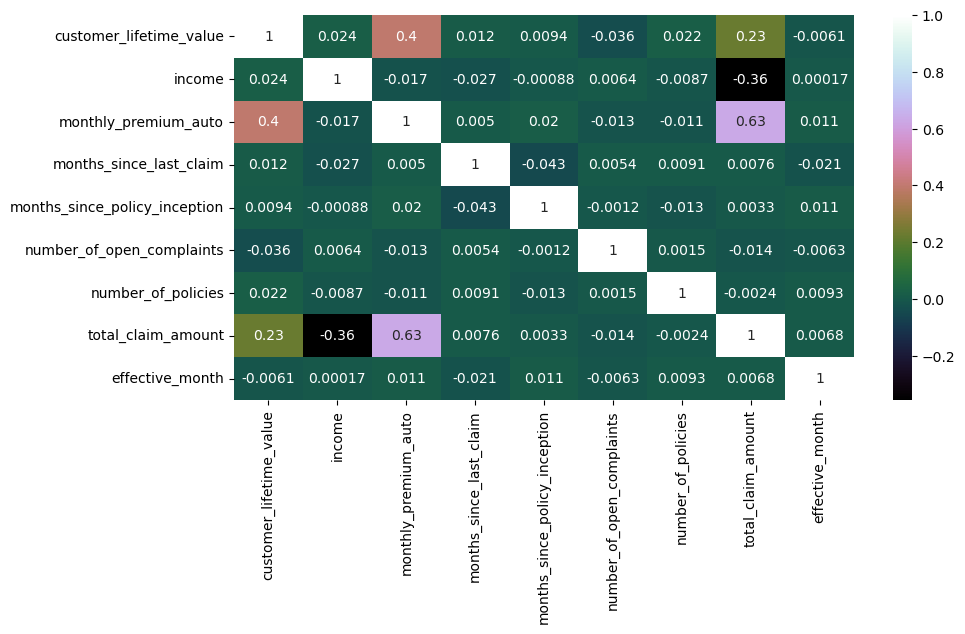

In [71]:
correlations_matrix = numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlations_matrix, annot=True, cmap="cubehelix") # annot = False: doesn't show the values of the correlation
plt.show()

Total claim amount as dependent variable
- For future regressions, I would discard those variables with super low correlation with the dependent variable, unless there's an justification (expert view).